In [1]:
import pandas as pd

In [20]:
data = pd.read_csv("data/data_merged_encoded.csv")
data

,FIPS,2024 Urban Influence Code,"Percent of adults who are not high school graduates, 2019-23","Percent of adults who are high school graduates (or equivalent), 2019-23","Percent of adults completing some college or associate degree, 2019-23","Percent of adults with a bachelor's degree or higher, 2019-23",Economic_typology_2015,NATURAL_CHG_2023,DOMESTIC_MIG_2023,R_BIRTH_2023,...,State_SD,State_TN,State_TX,State_UT,State_VA,State_VT,State_WA,State_WI,State_WV,State_WY
0,1001,-0.426905,-0.278537,-0.151198,-0.297658,0.418089,-0.995489,-0.051421,0.125382,0.480823,...,False,False,False,False,False,False,False,False,False,False
1,1003,-0.426905,-0.543725,-0.822225,0.096189,0.862459,1.754927,-0.205564,1.747120,-0.246254,...,False,False,False,False,False,False,False,False,False,False
2,1005,-0.037317,1.997280,0.493048,-0.407219,-1.237164,0.654761,-0.185724,-0.012310,0.036498,...,False,False,False,False,False,False,False,False,False,False
3,1007,-1.595670,1.536006,0.953446,-0.597235,-1.236820,-0.995489,-0.160542,-0.018475,0.076891,...,False,False,False,False,False,False,False,False,False,False
4,1009,-1.595670,1.105865,0.233289,0.116699,-0.832226,-0.995489,-0.181909,0.091216,0.400036,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3127,56037,0.741860,-0.689741,-0.351006,1.924569,-0.360120,0.104677,-0.073551,-0.046990,-0.125074,...,False,False,False,False,False,False,False,False,False,True
3128,56039,0.741860,-1.534765,-2.311755,-2.108917,3.659809,1.754927,-0.046079,-0.057523,-1.013723,...,False,False,False,False,False,False,False,False,False,True
3129,56041,0.741860,-1.068681,0.281985,1.219039,-0.267269,0.104677,-0.086523,-0.006659,0.117285,...,False,False,False,False,False,False,False,False,False,True
3130,56043,1.521036,-0.486824,-0.466029,1.565607,-0.197078,-0.995489,-0.150622,0.005672,-0.569399,...,False,False,False,False,False,False,False,False,False,True


In [21]:
filtered = data.drop(['FIPS', 'State_AK', 'State_AL',
       'State_AR', 'State_AZ', 'State_CA', 'State_CO', 'State_DC', 'State_DE',
       'State_FL', 'State_GA', 'State_HI', 'State_IA', 'State_ID', 'State_IL',
       'State_IN', 'State_KS', 'State_KY', 'State_LA', 'State_MA', 'State_MD',
       'State_ME', 'State_MI', 'State_MN', 'State_MO', 'State_MS', 'State_MT',
       'State_NC', 'State_ND', 'State_NE', 'State_NH', 'State_NJ', 'State_NM',
       'State_NV', 'State_NY', 'State_OH', 'State_OK', 'State_OR', 'State_PA',
       'State_RI', 'State_SC', 'State_SD', 'State_TN', 'State_TX', 'State_UT',
       'State_VA', 'State_VT', 'State_WA', 'State_WI', 'State_WV', 'State_WY'], axis=1)

In [22]:
filtered.columns

Index(['2024 Urban Influence Code',
       'Percent of adults who are not high school graduates, 2019-23',
       'Percent of adults who are high school graduates (or equivalent), 2019-23',
       'Percent of adults completing some college or associate degree, 2019-23',
       'Percent of adults with a bachelor's degree or higher, 2019-23',
       'Economic_typology_2015', 'NATURAL_CHG_2023', 'DOMESTIC_MIG_2023',
       'R_BIRTH_2023', 'R_NATURAL_CHG_2023', 'R_INTERNATIONAL_MIG_2023',
       'R_DOMESTIC_MIG_2023', 'MEDHHINC_2023', 'PCTPOVALL_2023',
       'Employed_2023', 'Unemployment_rate_2023'],
      dtype='object')

In [23]:
data.columns

Index(['FIPS', '2024 Urban Influence Code',
       'Percent of adults who are not high school graduates, 2019-23',
       'Percent of adults who are high school graduates (or equivalent), 2019-23',
       'Percent of adults completing some college or associate degree, 2019-23',
       'Percent of adults with a bachelor's degree or higher, 2019-23',
       'Economic_typology_2015', 'NATURAL_CHG_2023', 'DOMESTIC_MIG_2023',
       'R_BIRTH_2023', 'R_NATURAL_CHG_2023', 'R_INTERNATIONAL_MIG_2023',
       'R_DOMESTIC_MIG_2023', 'MEDHHINC_2023', 'PCTPOVALL_2023',
       'Employed_2023', 'Unemployment_rate_2023', 'State_AK', 'State_AL',
       'State_AR', 'State_AZ', 'State_CA', 'State_CO', 'State_DC', 'State_DE',
       'State_FL', 'State_GA', 'State_HI', 'State_IA', 'State_ID', 'State_IL',
       'State_IN', 'State_KS', 'State_KY', 'State_LA', 'State_MA', 'State_MD',
       'State_ME', 'State_MI', 'State_MN', 'State_MO', 'State_MS', 'State_MT',
       'State_NC', 'State_ND', 'State_NE', 'Sta

In [20]:
import sys
!{sys.executable} -m pip install seaborn

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)

[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: /opt/homebrew/Cellar/jupyterlab/4.2.5_1/libexec/bin/python -m pip install --upgrade pip


In [6]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
import seaborn as sns

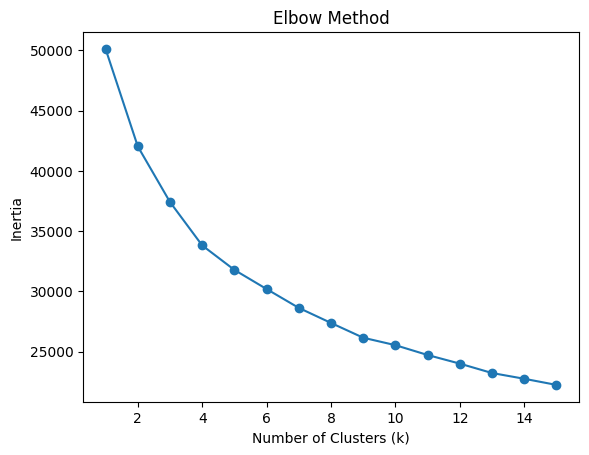

In [24]:
inertia = []
k_range = range(1, 16)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(filtered)
    inertia.append(kmeans.inertia_)

plt.plot(k_range, inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

In [25]:
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(filtered)

filtered['cluster'] = clusters

In [26]:
filtered

,2024 Urban Influence Code,"Percent of adults who are not high school graduates, 2019-23","Percent of adults who are high school graduates (or equivalent), 2019-23","Percent of adults completing some college or associate degree, 2019-23","Percent of adults with a bachelor's degree or higher, 2019-23",Economic_typology_2015,NATURAL_CHG_2023,DOMESTIC_MIG_2023,R_BIRTH_2023,R_NATURAL_CHG_2023,R_INTERNATIONAL_MIG_2023,R_DOMESTIC_MIG_2023,MEDHHINC_2023,PCTPOVALL_2023,Employed_2023,Unemployment_rate_2023,cluster
0,-0.426905,-0.278537,-0.151198,-0.297658,0.418089,-0.995489,-0.051421,0.125382,0.480823,0.781117,-0.333898,0.359741,0.205146,-0.505364,-0.147065,-1.137550,1
1,-0.426905,-0.543725,-0.822225,0.096189,0.862459,1.754927,-0.205564,1.747120,-0.246254,0.374123,-0.052500,1.866632,0.532121,-0.811439,0.310732,-1.055631,1
2,-0.037317,1.997280,0.493048,-0.407219,-1.237164,0.654761,-0.185724,-0.012310,0.036498,-0.268497,-0.380797,-0.433359,-1.223756,1.979240,-0.260981,0.664661,2
3,-1.595670,1.536006,0.953446,-0.597235,-1.236820,-0.995489,-0.160542,-0.018475,0.076891,-0.032870,-0.615296,-0.536462,-0.573141,0.880973,-0.255145,-0.891794,2
4,-1.595670,1.105865,0.233289,0.116699,-0.832226,-0.995489,-0.181909,0.091216,0.400036,0.181337,-0.427697,0.185259,-0.031094,-0.307316,-0.153887,-1.219469,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3127,0.741860,-0.689741,-0.351006,1.924569,-0.360120,0.104677,-0.073551,-0.046990,-0.125074,0.781117,-0.755994,-0.639565,0.665192,-0.811439,-0.188437,-0.236445,1
3128,0.741860,-1.534765,-2.311755,-2.108917,3.659809,1.754927,-0.046079,-0.057523,-1.013723,1.380896,0.510296,-1.044046,3.923056,-1.495605,-0.204298,-1.219469,0
3129,0.741860,-1.068681,0.281985,1.219039,-0.267269,0.104677,-0.086523,-0.006659,0.117285,0.952482,-0.755994,-0.377842,0.825556,-0.757425,-0.253626,-0.318363,1
3130,1.521036,-0.486824,-0.466029,1.565607,-0.197078,-0.995489,-0.150622,0.005672,-0.569399,-0.568387,-0.662195,-0.036809,-0.162588,-0.397338,-0.284446,-0.236445,1


In [27]:
filtered["cluster"]

0       1
1       1
2       2
3       2
4       1
       ..
3127    1
3128    0
3129    1
3130    1
3131    1
Name: cluster, Length: 3132, dtype: int32

In [28]:
cluster_sizes = filtered['cluster'].value_counts()

# Display cluster sizes
print(cluster_sizes)

cluster
1    1568
2    1039
0     501
3      24
Name: count, dtype: int64


In [29]:
centroids = kmeans.cluster_centers_
feature_importance = np.std(centroids, axis=0)

# Top 5 features
top_features_idx = np.argsort(feature_importance)[::-1][:5]
top_features = filtered.columns[top_features_idx]

print("Top 5 features:", top_features)

Top 5 features: Index(['NATURAL_CHG_2023', 'Employed_2023', 'DOMESTIC_MIG_2023',
       'R_INTERNATIONAL_MIG_2023',
       'Percent of adults with a bachelor's degree or higher, 2019-23'],
      dtype='object')


In [33]:
filtered.columns

Index(['2024 Urban Influence Code',
       'Percent of adults who are not high school graduates, 2019-23',
       'Percent of adults who are high school graduates (or equivalent), 2019-23',
       'Percent of adults completing some college or associate degree, 2019-23',
       'Percent of adults with a bachelor's degree or higher, 2019-23',
       'Economic_typology_2015', 'NATURAL_CHG_2023', 'DOMESTIC_MIG_2023',
       'R_BIRTH_2023', 'R_NATURAL_CHG_2023', 'R_INTERNATIONAL_MIG_2023',
       'R_DOMESTIC_MIG_2023', 'MEDHHINC_2023', 'PCTPOVALL_2023',
       'Employed_2023', 'Unemployment_rate_2023', 'cluster'],
      dtype='object')

In [34]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.preprocessing import StandardScaler

# Calculate evaluation metrics
metrics = {
    "Silhouette Score": silhouette_score(filtered, filtered['cluster']),
    "Calinski-Harabasz Index": calinski_harabasz_score(filtered, filtered['cluster']),
    "Davies-Bouldin Index": davies_bouldin_score(filtered, filtered['cluster'])
}

print("Clustering Evaluation Metrics:")
for name, value in metrics.items():
    print(f"{name}: {value:.3f}")

Clustering Evaluation Metrics:
Silhouette Score: 0.166
Calinski-Harabasz Index: 549.592
Davies-Bouldin Index: 1.628


In [31]:
np.argsort(feature_importance)[::-1]

array([ 6, 14,  7, 10,  4, 12,  2,  0,  9,  1, 13,  3, 11, 15,  5,  8])

In [30]:
filtered.columns[np.argsort(feature_importance)[::-1]]

Index(['NATURAL_CHG_2023', 'Employed_2023', 'DOMESTIC_MIG_2023',
       'R_INTERNATIONAL_MIG_2023',
       'Percent of adults with a bachelor's degree or higher, 2019-23',
       'MEDHHINC_2023',
       'Percent of adults who are high school graduates (or equivalent), 2019-23',
       '2024 Urban Influence Code', 'R_NATURAL_CHG_2023',
       'Percent of adults who are not high school graduates, 2019-23',
       'PCTPOVALL_2023',
       'Percent of adults completing some college or associate degree, 2019-23',
       'R_DOMESTIC_MIG_2023', 'Unemployment_rate_2023',
       'Economic_typology_2015', 'R_BIRTH_2023'],
      dtype='object')

In [66]:
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=filtered.columns)
centroids['cluster'] = centroids.index

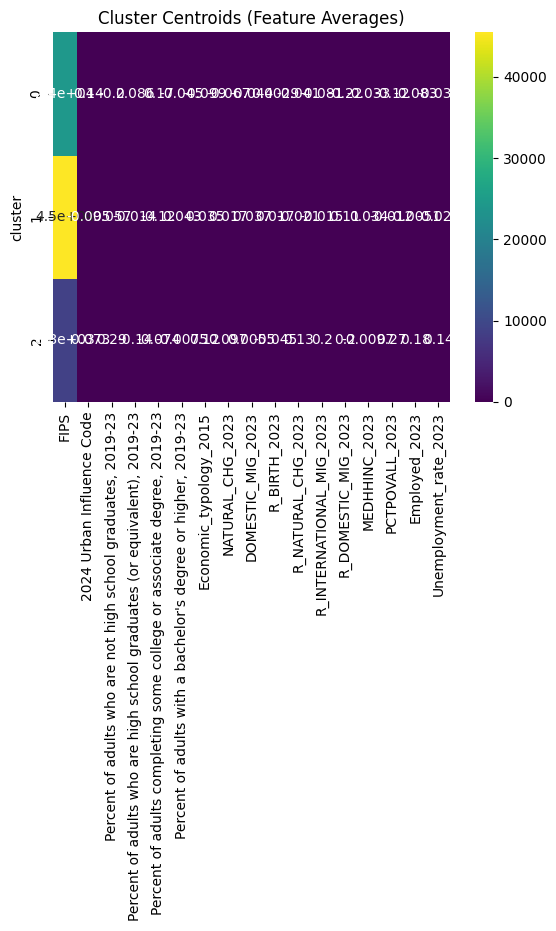

In [67]:
sns.heatmap(centroids.set_index('cluster'), cmap='viridis', annot=True)
plt.title("Cluster Centroids (Feature Averages)")
plt.show()

In [73]:
centroids

,FIPS,2024 Urban Influence Code,"Percent of adults who are not high school graduates, 2019-23","Percent of adults who are high school graduates (or equivalent), 2019-23","Percent of adults completing some college or associate degree, 2019-23","Percent of adults with a bachelor's degree or higher, 2019-23",Economic_typology_2015,NATURAL_CHG_2023,DOMESTIC_MIG_2023,R_BIRTH_2023,R_NATURAL_CHG_2023,R_INTERNATIONAL_MIG_2023,R_DOMESTIC_MIG_2023,MEDHHINC_2023,PCTPOVALL_2023,Employed_2023,Unemployment_rate_2023,cluster
0,24157.950000,0.141894,-0.203472,0.085671,0.173968,-0.044878,-0.099312,-0.066800,-0.044258,0.002938,-0.041010,-0.081031,-0.217841,-0.033235,-0.117295,-0.082952,-0.035266,0
1,45462.965850,-0.094584,0.057391,-0.013926,-0.123018,0.043228,0.035253,0.017306,0.037059,0.016886,-0.021118,-0.014688,0.109258,0.033826,-0.012362,-0.005117,-0.029428,1
2,8799.899145,-0.073279,0.285233,-0.143671,-0.073602,-0.007478,0.122543,0.097177,0.005456,-0.044909,0.132747,0.200036,0.195278,-0.009711,0.269070,0.181941,0.140101,2


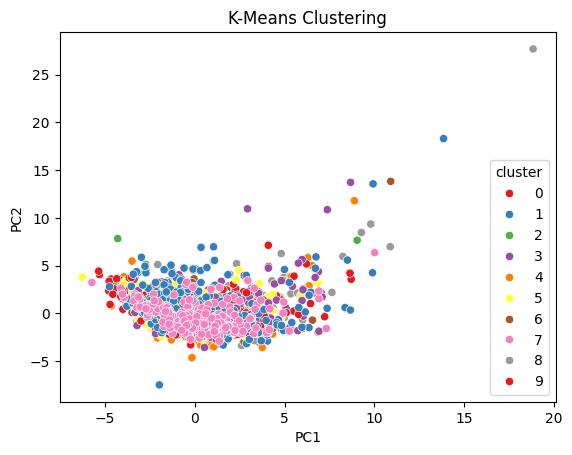

In [52]:
sns.scatterplot(data=df, x=df.columns[0], y=df.columns[1], hue='cluster', palette='Set1')
plt.title("K-Means Clustering")
plt.show()

In [46]:
from sklearn.cluster import DBSCAN

points = np.array(df)

# hard coded values, could definitely be optimized
distance, min_samples = 51, 1

db = DBSCAN(eps = distance, min_samples = min_samples).fit(points)

# Printing out number of clusters
print("Num Clusters:", db.labels_.max() + 1)

Num Clusters: 1
